In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import log
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Load and split the dataset
data = np.genfromtxt('./BivariateData/18.csv', delimiter=',')
x = data[:, 0]
y = data[:, 1]
z = data[:, 2]

# Merge x and y into a new feature
xy_combined = np.column_stack((x, y))

x_train = xy_combined[:7140]
z_train = z[:7140]

x_test = xy_combined[7140:]
z_test = z[7140:]

path = "./Plot/"

# Define the number of points along each dimension
num_points_x = 100  # Number of points along the x-axis
num_points_y = 100  # Number of points along the y-axis

# Create a mesh grid
x = np.linspace(0, 1, num_points_x)
y = np.linspace(0, 1, num_points_y)
xx, yy = np.meshgrid(x, y)

# Combine the mesh coordinates into a single variable
mesh_points = np.column_stack((xx.ravel(), yy.ravel()))

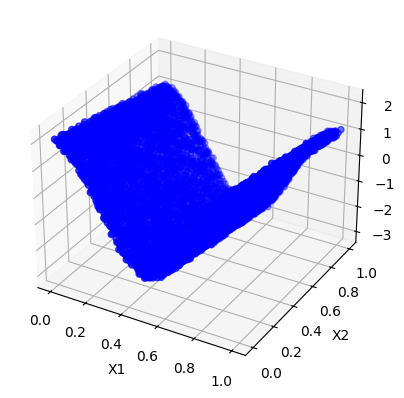

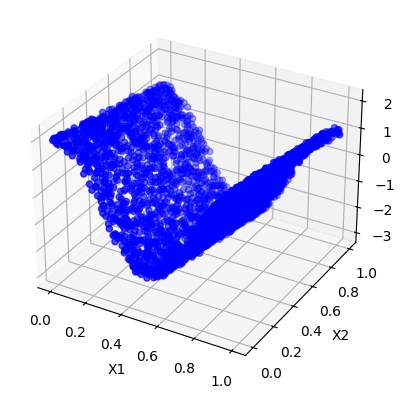

In [2]:
# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data
# ax.scatter(data[:,0],data[:,1],data[:,2])
ax.scatter(x_train[:,0], x_train[:,1], z_train, c='b', marker='o')  # Use x_train for the merged feature

# Set axis labels
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

# Show the plot
plt.show()

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data
# ax.scatter(data[:,0],data[:,1],data[:,2])
ax.scatter(x_test[:,0], x_test[:,1], z_test, c='b', marker='o')  # Use x_train for the merged feature

# Set axis labels
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

# Show the plot
plt.show()

11


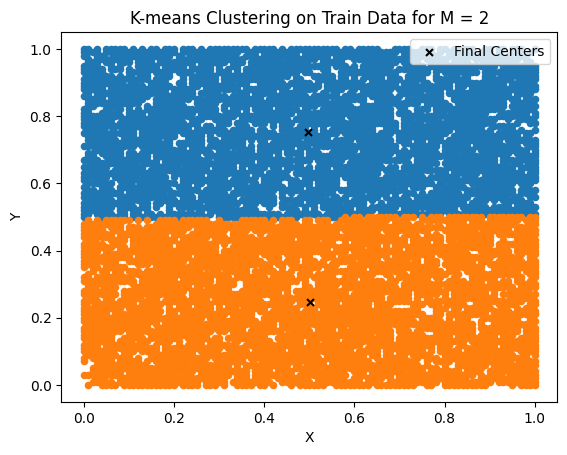

22


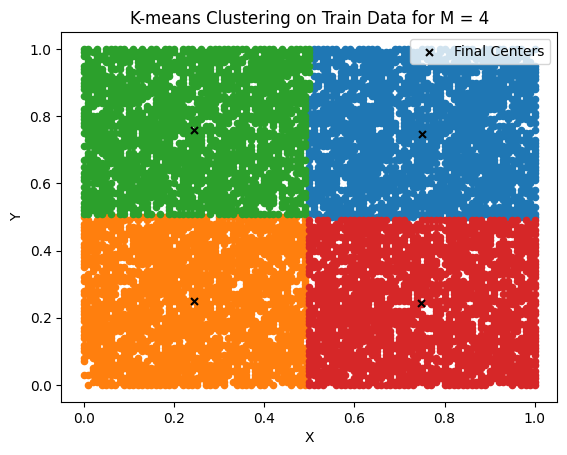

33


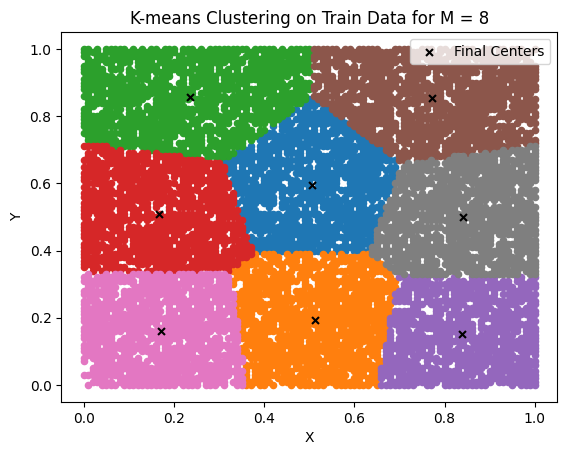

53


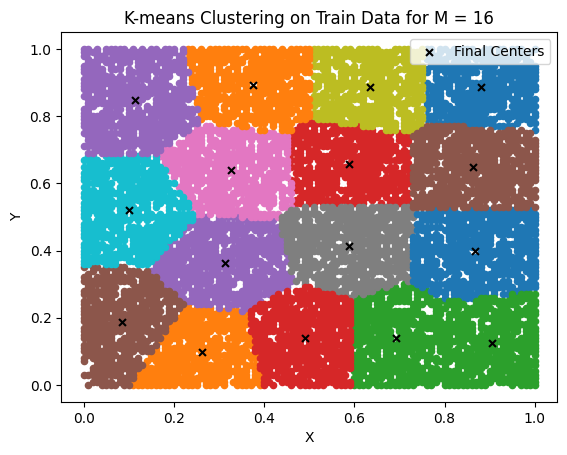

58


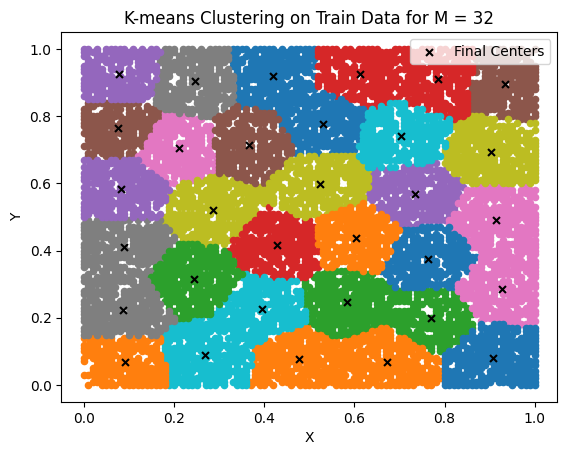

43


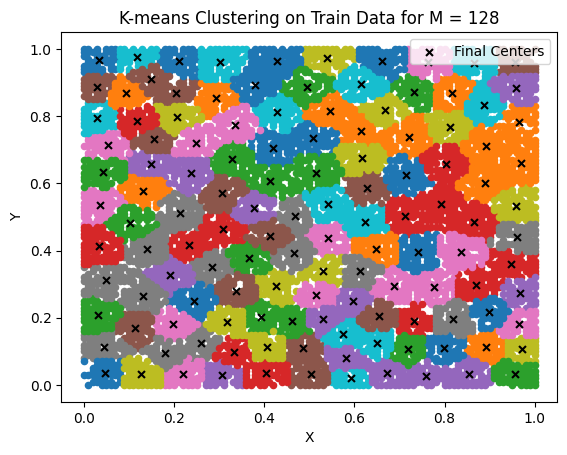

35


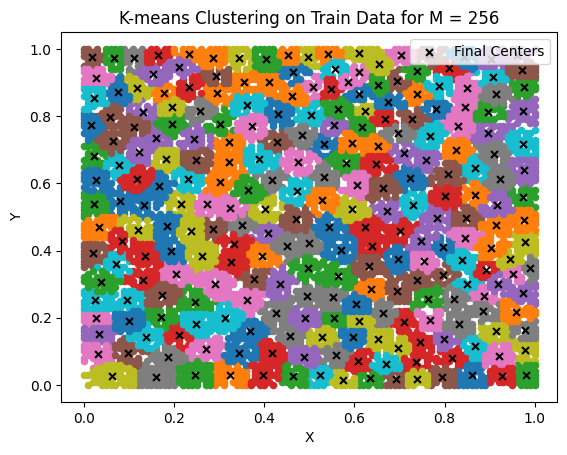

In [3]:
def initialize_centers(data, num_clusters):
    # Randomly initialize cluster centers
    np.random.shuffle(data)
    return data[:num_clusters]

def assign_to_clusters(data, centers):
    # Assign each data point to the nearest cluster
    distances = np.linalg.norm(data[:, np.newaxis] - centers, axis=2)
    return np.argmin(distances, axis=1)

def update_centers(data, cluster_assignments, num_clusters):
    new_centers = np.zeros((num_clusters, data.shape[1]))
    for cluster in range(num_clusters):
        cluster_points = data[cluster_assignments == cluster]
        if len(cluster_points) > 0:
            new_centers[cluster] = np.mean(cluster_points, axis=0)
    return new_centers

def k_means(data, num_clusters, max_iterations):
    centers = initialize_centers(data, num_clusters)
    for iteration in range(max_iterations):
        cluster_assignments = assign_to_clusters(data, centers)
        new_centers = update_centers(data, cluster_assignments, num_clusters)
        if np.all(centers == new_centers):
            print(iteration)
            break
        centers = new_centers
    return centers, cluster_assignments

# Set a fixed random seed for reproducibility
np.random.seed(0)

# Define your K-means functions and code as before...

num_clusters = [2, 4, 8, 16, 32, 128, 256]

final_centers_list = []

for num in num_clusters:
    max_iterations = 100
    x_train_copy = x_train.copy()
    final_centers, cluster_assignments = k_means(x_train_copy, num, max_iterations)
    final_centers_list.append(final_centers)
    # Visualize K-means results:
    plt.figure()
    for i in range(num):
        plt.scatter(x_train_copy[cluster_assignments == i, 0], x_train_copy[cluster_assignments == i, 1], s=20)

    plt.scatter(final_centers[:, 0], final_centers[:, 1], c='black', marker='x', s=25, label='Final Centers')

    # Define the filename dynamically
    file_name = f'K-means Clustering on Train Data for M = {num}'
    
    # Combine the directory path and filename to create the complete save path
    save_path = path + file_name
    
    plt.title(file_name)
    plt.legend()

    # Set X and Y axis labels
    plt.xlabel('X')
    plt.ylabel('Y')
    
    # Save the plot to the specified path
    plt.savefig(save_path)

    # Show the plot
    plt.show()


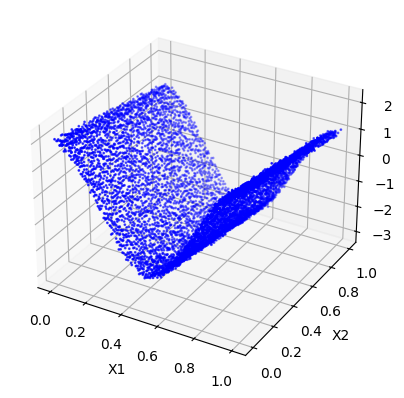

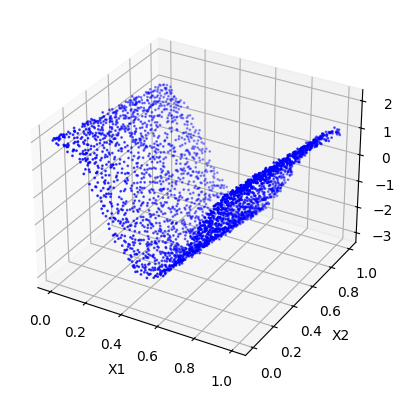

In [4]:
# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data
# ax.scatter(data[:,0],data[:,1],data[:,2])
ax.scatter(x_train[:,0], x_train[:,1], z_train, c='b', s=1)  # Use x_train for the merged feature

# Set axis labels
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

# Show the plot
plt.show()

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data
# ax.scatter(data[:,0],data[:,1],data[:,2])
ax.scatter(x_test[:,0], x_test[:,1], z_test, c='b', s=1)  # Use x_train for the merged feature

# Set axis labels
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

# Show the plot
plt.show()

In [5]:
def calculate_w_for_k(input, output, centers, k, alpha):
    # Create a matrix to store the Radial Basis Function (RBF) values between input points and centers
    dm = np.empty((len(input), len(centers[k])))

    # Calculate the maximum distance 's' between any two points in the 'k' cluster
    s = max(np.linalg.norm(np.array(coord1) - np.array(coord2)) for coord1 in centers[k] for coord2 in centers[k])
    
    # Precompute the inverse of 's'
    s_inv = -1.0 / s
    
    # Iterate over each input point and calculate RBF values for each center in the 'k' cluster
    for i, num in enumerate(input):
        rbf_values = [np.exp(s_inv * np.linalg.norm(num - center) ** 2) for center in centers[k]]
        dm[i] = rbf_values
    
    # Transpose the RBF matrix
    dm_T = dm.T
    
    # Compute the product of the transposed RBF matrix and itself
    result_degree_2 = dm_T @ dm
    
    n, m = result_degree_2.shape
    result_degree_2 -= alpha * np.identity(m)

    # Compute the inverse of the result from the previous step
    result_inverse_degree_2 = np.linalg.inv(result_degree_2)
    
    # Compute the product of the inverse and the transposed RBF matrix
    result_product_degree_2 = result_inverse_degree_2 @ dm_T
    
    # Calculate 'w' by multiplying the above result with 'test'
    w = result_product_degree_2 @ output
    
    return dm, w

# For training data
d2, w2 = calculate_w_for_k(x_train, z_train, final_centers_list, 0, 0)
d4, w4 = calculate_w_for_k(x_train, z_train, final_centers_list, 1, 0)
d8, w8 = calculate_w_for_k(x_train, z_train, final_centers_list, 2, 0)
d16, w16 = calculate_w_for_k(x_train, z_train, final_centers_list, 3, 0)
d32, w32 = calculate_w_for_k(x_train, z_train, final_centers_list, 4, 0)
d128, w128 = calculate_w_for_k(x_train, z_train, final_centers_list, 5, 0)
d256, w256 = calculate_w_for_k(x_train, z_train, final_centers_list, 6, 0)

# For testing data
d2_test, w2_test = calculate_w_for_k(x_test, z_test, final_centers_list, 0, 0)
d4_test, w4_test = calculate_w_for_k(x_test, z_test, final_centers_list, 1, 0)
d8_test, w8_test = calculate_w_for_k(x_test, z_test, final_centers_list, 2, 0)
d16_test, w16_test = calculate_w_for_k(x_test, z_test, final_centers_list, 3, 0)
d32_test, w32_test = calculate_w_for_k(x_test, z_test, final_centers_list, 4, 0)
d128_test, w128_test = calculate_w_for_k(x_test, z_test, final_centers_list, 5, 0)
d256_test, w256_test = calculate_w_for_k(x_test, z_test, final_centers_list, 6, 0)

# For mesh data
d2_mesh, w2_mesh = calculate_w_for_k(mesh_points, mesh_points[:,0], final_centers_list, 0, 0)
d4_mesh, w4_mesh = calculate_w_for_k(mesh_points, mesh_points[:,0], final_centers_list, 1, 0)
d8_mesh, w8_mesh = calculate_w_for_k(mesh_points, mesh_points[:,0], final_centers_list, 2, 0)
d16_mesh, w16_mesh = calculate_w_for_k(mesh_points, mesh_points[:,0], final_centers_list, 3, 0)
d32_mesh, w32_mesh = calculate_w_for_k(mesh_points, mesh_points[:,0], final_centers_list, 4, 0)
d128_mesh, w128_mesh = calculate_w_for_k(mesh_points, mesh_points[:,0], final_centers_list, 5, 0)
d256_mesh, w256_mesh = calculate_w_for_k(mesh_points, mesh_points[:,0], final_centers_list, 6, 0)

# Calculate predictions on the training set using 'w' values
model_train_2 = np.dot(d2, w2)
model_train_4 = np.dot(d4, w4)
model_train_8 = np.dot(d8, w8)
model_train_16 = np.dot(d16, w16)
model_train_32 = np.dot(d32, w32)
model_train_128 = np.dot(d128, w128)
model_train_256 = np.dot(d256, w256)

# Calculate predictions on the mesh set using 'w' values
model_mesh_2 = np.dot(d2_mesh, w2)
model_mesh_4 = np.dot(d4_mesh, w4)
model_mesh_8 = np.dot(d8_mesh, w8)
model_mesh_16 = np.dot(d16_mesh, w16)
model_mesh_32 = np.dot(d32_mesh, w32)
model_mesh_128 = np.dot(d128_mesh, w128)
model_mesh_256 = np.dot(d256_mesh, w256)

# Use the same 'w' values from the training set to make predictions on the test set
model_test_2 = np.dot(d2_test, w2)
model_test_4 = np.dot(d4_test, w4)
model_test_8 = np.dot(d8_test, w8)
model_test_16 = np.dot(d16_test, w16)
model_test_32 = np.dot(d32_test, w32)
model_test_128 = np.dot(d128_test, w128)
model_test_256 = np.dot(d256_test, w256)

In [7]:
print(w2)

[-1.31461047  0.32598009]


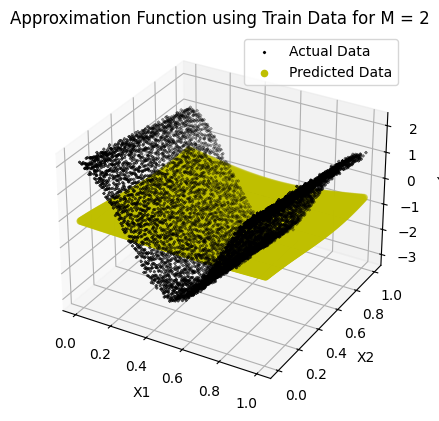

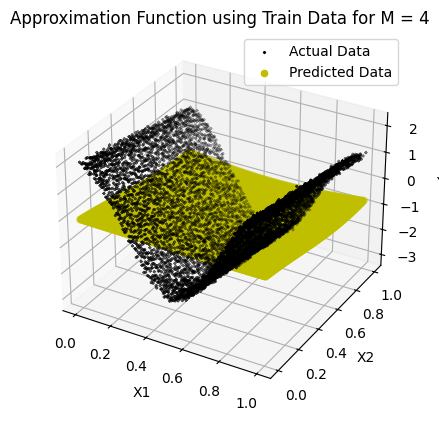

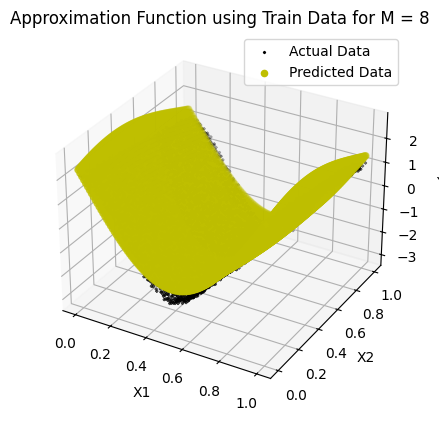

KeyboardInterrupt: 

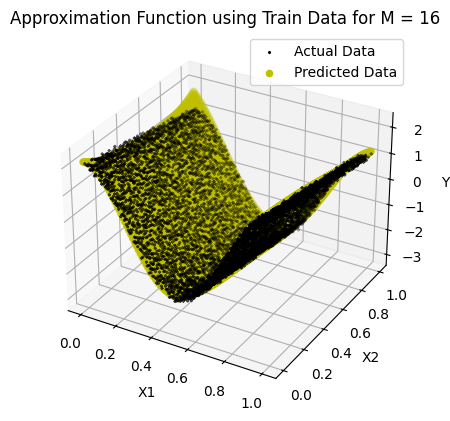

In [6]:
# Create a dictionary to store the model_mesh values for different k
model_mesh_dict = {}

# Populate the dictionary with model_mesh values (replace with actual values)
model_mesh_dict[2] = model_mesh_2  # Replace with your actual model_mesh_2
model_mesh_dict[4] = model_mesh_4  # Replace with your actual model_mesh_4
model_mesh_dict[8] = model_mesh_8  # Replace with your actual model_mesh_8
model_mesh_dict[16] = model_mesh_16  # Replace with your actual model_mesh_16
model_mesh_dict[32] = model_mesh_32  # Replace with your actual model_mesh_32
model_mesh_dict[128] = model_mesh_128  # Replace with your actual model_mesh_128
model_mesh_dict[256] = model_mesh_256  # Replace with your actual model_mesh_256

for k in num_clusters:
    # Get the model_mesh value for the current k
    model_mesh_k = model_mesh_dict.get(k, None)

    if model_mesh_k is not None:
        # Create a 3D scatter plot
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        # Plot the data
        ax.scatter(x_train[:, 0], x_train[:, 1], z_train, c='black', marker='x', s=2, label="Actual Data")  # Use x_mesh for the merged feature
        ax.scatter(mesh_points[:, 0], mesh_points[:, 1], model_mesh_k, c='y', marker='o', label="Predicted Data")  # Use x_mesh for the merged feature

        # Set axis labels
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')

        # Define the filename dynamically
        file_name = f"Approximation Function using Train Data for M = {k}"

        # Combine the directory path and filename to create the complete save path
        save_path = path + file_name

        # Set the title of the plot
        plt.title(file_name)

        plt.legend()

        # Save the plot to the specified path
        plt.savefig(save_path)
        
        # Show the plot
        plt.show()

In [ ]:
# Create a dictionary to store the model_train values for different k
model_train_dict = {}

# Populate the dictionary with model_train values (replace with actual values)
model_train_dict[2] = model_train_2  # Replace with your actual model_train_2
model_train_dict[4] = model_train_4  # Replace with your actual model_train_4
model_train_dict[8] = model_train_8  # Replace with your actual model_train_8
model_train_dict[16] = model_train_16  # Replace with your actual model_train_16
model_train_dict[32] = model_train_32  # Replace with your actual model_train_32
model_train_dict[128] = model_train_128  # Replace with your actual model_train_128
model_train_dict[256] = model_train_256  # Replace with your actual model_train_256

for k in num_clusters:
    # Get the model_train value for the current k
    model_train_k = model_train_dict.get(k, None)

    if model_train_k is not None:
        # Create a 3D scatter plot
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        # Plot the data
        ax.scatter(x_train[:, 0], x_train[:, 1], z_train, c='black', marker='o', s=2, label="Target Ouput")  # Use x_train for the merged feature
        ax.scatter(x_train[:, 0], x_train[:, 1], model_train_k, c='y', marker='o', s=2, label="Model Ouput")  # Use x_train for the merged feature

        # Set axis labels
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')

        # Define the filename dynamically
        file_name = f"Model Output and Target Output for Train Data at M = {k}"

        # Combine the directory path and filename to create the complete save path
        save_path = path + file_name

        # Set the title of the plot
        plt.title(file_name)

        # Save the plot to the specified path
        plt.savefig(save_path)
        
        # Show the plot
        plt.show()

In [ ]:
plt.figure()  # Create a new figure

# Create the scatter plot
plt.scatter(z_train, model_train_2, s=2, c='y')

# Set the labels for the axes
plt.xlabel('Target Output')
plt.ylabel('Model Output')

plt.title(f"Target vs Model Ouput for Train Data at M = 2")
# Show the plot
plt.show()

plt.figure()  # Create a new figure

# Create the scatter plot
plt.scatter(z_test, model_test_2, s=2, c='y')

# Set the labels for the axes
plt.xlabel('Target Output')
plt.ylabel('Model Output')

plt.title(f"Target vs Model Ouput for Test Data at M = 2")
# Show the plot
plt.show()

In [ ]:
plt.figure()  # Create a new figure

# Create the scatter plot
plt.scatter(z_train, model_train_4, s=2, c='y')

# Set the labels for the axes
plt.xlabel('Target Output')
plt.ylabel('Model Output')

plt.title(f"Target vs Model Ouput for Train Data at M = 4")
# Show the plot
plt.show()

plt.figure()  # Create a new figure

# Create the scatter plot
plt.scatter(z_test, model_test_4, s=2, c='y')

# Set the labels for the axes
plt.xlabel('Target Output')
plt.ylabel('Model Output')

plt.title(f"Target vs Model Ouput for Test Data at M = 4")
# Show the plot
plt.show()

In [ ]:
plt.figure()  # Create a new figure

# Create the scatter plot
plt.scatter(z_train, model_train_8, s=2, c='y')

# Set the labels for the axes
plt.xlabel('Target Output')
plt.ylabel('Model Output')

plt.title(f"Target vs Model Ouput for Train Data at M = 8")
# Show the plot
plt.show()

plt.figure()  # Create a new figure

# Create the scatter plot
plt.scatter(z_test, model_test_8, s=2, c='y')

# Set the labels for the axes
plt.xlabel('Target Output')
plt.ylabel('Model Output')

plt.title(f"Target vs Model Ouput for Test Data at M = 8")
# Show the plot
plt.show()

In [ ]:
plt.figure()  # Create a new figure

# Create the scatter plot
plt.scatter(z_train, model_train_16, s=2, c='y')

# Set the labels for the axes
plt.xlabel('Target Output')
plt.ylabel('Model Output')

plt.title(f"Target vs Model Ouput for Train Data at M = 16")
# Show the plot
plt.show()

plt.figure()  # Create a new figure

# Create the scatter plot
plt.scatter(z_test, model_test_16, s=2, c='y')

# Set the labels for the axes
plt.xlabel('Target Output')
plt.ylabel('Model Output')

plt.title(f"Target vs Model Ouput for Test Data at M = 16")
# Show the plot
plt.show()

In [ ]:
plt.figure()  # Create a new figure

# Create the scatter plot
plt.scatter(z_train, model_train_32, s=2, c='y')

# Set the labels for the axes
plt.xlabel('Target Output')
plt.ylabel('Model Output')

plt.title(f"Target vs Model Ouput for Train Data at M = 32")
# Show the plot
plt.show()

plt.figure()  # Create a new figure

# Create the scatter plot
plt.scatter(z_test, model_test_32, s=2, c='y')

# Set the labels for the axes
plt.xlabel('Target Output')
plt.ylabel('Model Output')

plt.title(f"Target vs Model Ouput for Test Data at M = 32")
# Show the plot
plt.show()

In [ ]:
# Create a dictionary to store the model_test values for different k
model_test_dict = {}

# Populate the dictionary with model_test values (replace with actual values)
model_test_dict[2] = model_test_2  # Replace with your actual model_test_2
model_test_dict[4] = model_test_4  # Replace with your actual model_test_4
model_test_dict[8] = model_test_8  # Replace with your actual model_test_8
model_test_dict[16] = model_test_16  # Replace with your actual model_test_16
model_test_dict[32] = model_test_32  # Replace with your actual model_test_32
model_test_dict[128] = model_test_128  # Replace with your actual model_test_128
model_test_dict[256] = model_test_256  # Replace with your actual model_test_256

for k in num_clusters:
    # Get the model_test value for the current k
    model_test_k = model_test_dict.get(k, None)

    if model_test_k is not None:
        # Create a 3D scatter plot
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        # Plot the data
        ax.scatter(x_test[:, 0], x_test[:, 1], z_test, c='black', marker='o', s=2, label="Target Ouput")  # Use x_test for the merged feature
        ax.scatter(x_test[:, 0], x_test[:, 1], model_test_k, c='y', marker='o', s=2, label="Model Output")  # Use x_test for the merged feature

        # Set axis labels
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')

        # Define the filename dynamically
        file_name = f"Model Output and Target Output for Test Data at M = {k}"

        # Combine the directory path and filename to create the complete save path
        save_path = path + file_name

        # Set the title of the plot
        plt.title(file_name)

        # Save the plot to the specified path
        plt.savefig(save_path)

        # Show the plot
        plt.show()

In [ ]:
# Calculate Mean Squared Error (MSE)
def calculate_mse(output, predicted_output):
    n = len(output)
    squared_errors = []

    for i in range(n):
        squared_errors.append((output[i] - predicted_output[i]) ** 2)

    mse = sum(squared_errors) / n
    return mse

# Define the list of values
values = [2, 4, 8, 16, 32, 128, 256]

# Initialize empty lists to store the MSE values for each value
mse_train = []
mse_test = []

# Iterate through the list of values and calculate MSE for each model
for value in values:
    model_variable_name_train = f"model_train_{value}"
    model_train = globals()[model_variable_name_train]
    mse_train_value = calculate_mse(z_train, model_train)
    mse_train.append(mse_train_value)

for value in values:
    model_variable_name_test = f"model_test_{value}"
    model_test = globals()[model_variable_name_test]
    mse_test_value = calculate_mse(z_test, model_test)
    mse_test.append(mse_test_value)

In [ ]:
for train in mse_train:
    print(train)

In [ ]:
for test in mse_test:
    print(test)

In [ ]:
# Nested loops to generate and save plots
for i in range(len(values) - 1):
    for j in range(i + 1, len(values)):
        value_subset = values[i:j + 1]

        # Select the corresponding data for the current subset of values
        mse_train_subset = [mse_train[values.index(val)] for val in value_subset]
        mse_test_subset = [mse_test[values.index(val)] for val in value_subset]

        # Create a plot for the current subset of values
        plt.figure(figsize=(8, 6))

        for idx, val in enumerate(value_subset):
            plt.plot(value_subset, mse_train_subset, marker='o', color='blue')
            plt.plot(value_subset, mse_test_subset, marker='x', color='red')

        plt.xlabel('Values')
        plt.ylabel('MSE')

        # Display a single legend for "Train MSE" and "Test MSE"
        plt.legend(["Train MSE", "Test MSE"])

        plt.grid(True)

        # Save the plot
        file_name = f'MSE vs. Values {value_subset}'
        save_path = path + file_name + '.png'  # Specify the directory where you want to save the plot
        plt.title(file_name)
        plt.savefig(save_path, format='png')  # Save the plot as a PNG
        plt.show()

In [ ]:
alpha_values = np.logspace(-7.5, -6.5, 10)
train_mse = []
test_mse = []
for alpha in alpha_values:
    d128_r, w128_r = calculate_w_for_k(x_train, z_train, final_centers_list, 5, alpha)
    d128_test_r, w128_test_r = calculate_w_for_k(x_test, z_test, final_centers_list, 5, alpha)
    model_train = np.dot(d128_r, w128_r)
    model_test = np.dot(d128_test_r, w128_r)
    train_mse.append(calculate_mse(z_train, model_train))
    test_mse.append(calculate_mse(z_test, model_test))

ln_alpha = []
for alpha in alpha_values:
    ln_alpha.append(log(alpha))

# Create a scatter plot to visualize the lambda vs MSE values
plt.figure()
plt.plot(ln_alpha, train_mse, label='Train MSE')
plt.plot(ln_alpha, test_mse, label='Test MSE')
plt.xlabel('ln λ')
plt.ylabel('MSE')
plt.title("Regularization for M = 256")
plt.legend()  # Show the legend to differentiate between actual and predicted values
plt.show()

In [ ]:
alpha = 1e-07
k = 256
d256_r, w256_r = calculate_w_for_k(x_train, z_train, final_centers_list, 6, alpha)
d256_test_r, w256_test_r = calculate_w_for_k(x_test, z_test, final_centers_list, 6, alpha)
d256_mesh_r, w256_mesh_r = calculate_w_for_k(mesh_points, mesh_points[:,0], final_centers_list, 6, alpha)
model_train = np.dot(d256_r, w256_r)
model_test = np.dot(d256_test_r, w256_r)
model_mesh = np.dot(d256_mesh_r, w256_r)
mse_train[6] = calculate_mse(z_train, model_train)
mse_test[6] = calculate_mse(z_test, model_test)
print(mse_train[6])
print(mse_test[6])

In [ ]:
# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Plot the data
ax.scatter(x_train[:, 0], x_train[:, 1], z_train, c='black', marker='o', s=2, label="Actual Data")  # Use x_mesh for the merged feature
ax.scatter(mesh_points[:, 0], mesh_points[:, 1], model_mesh, c='y', marker='o', label="Predicted Data")  # Use x_mesh for the merged feature
# Set axis labels
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
# Define the filename dynamically
file_name = f"Approximation Function using Train Data for M = {k} and λ = {alpha}"
# Combine the directory path and filename to create the complete save path
save_path = path + file_name
# Set the title of the plot
plt.title(file_name)
plt.legend()
# Save the plot to the specified path
plt.savefig(save_path)
# Show the plot
plt.show()

In [ ]:
# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Plot the data
ax.scatter(x_train[:, 0], x_train[:, 1], z_train, c='black', marker='o', s=2, label="Target Ouput")  # Use x_train for the merged feature
ax.scatter(x_train[:, 0], x_train[:, 1], model_train, c='y', marker='o', s=2, label="Model Ouput")  # Use x_train for the merged feature
# Set axis labels
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
# Define the filename dynamically
file_name = f"Model Output and Target Output for Train Data at M = {k} and λ = {alpha}"
# Combine the directory path and filename to create the complete save path
save_path = path + file_name
# Set the title of the plot
plt.title(file_name)
# Save the plot to the specified path
plt.savefig(save_path)

# Show the plot
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Plot the data
ax.scatter(x_test[:, 0], x_test[:, 1], z_test, c='black', marker='o', s=2, label="Target Ouput")  # Use x_test for the merged feature
ax.scatter(x_test[:, 0], x_test[:, 1], model_test, c='y', marker='o', s=2, label="Model Ouput")  # Use x_test for the merged feature
# Set axis labels
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
# Define the filename dynamically
file_name = f"Model Output and Target Output for Test Data at M = {k} and λ = {alpha}"
# Combine the directory path and filename to create the complete save path
save_path = path + file_name
# Set the title of the plot
plt.title(file_name)
# Save the plot to the specified path
plt.savefig(save_path)

# Show the plot
plt.show()

In [ ]:
plt.figure()  # Create a new figure

# Create the scatter plot
plt.scatter(z_train, model_train, s=2, c='y')

# Set the labels for the axes
plt.xlabel('Target Output')
plt.ylabel('Model Output')

plt.title(f"Target vs Model Ouput for Train Data at M = {k}")
# Show the plot
plt.show()

plt.figure()  # Create a new figure

# Create the scatter plot
plt.scatter(z_test, model_test, s=2, c='y')

# Set the labels for the axes
plt.xlabel('Target Output')
plt.ylabel('Model Output')

plt.title(f"Target vs Model Ouput for Test Data at M = {k}")
# Show the plot
plt.show()

In [ ]:
alpha_values = np.logspace(-9.9, -9.8, 10)
train_mse = []
test_mse = []
for alpha in alpha_values:
    d128_r, w128_r = calculate_w_for_k(x_train, z_train, final_centers_list, 5, alpha)
    d128_test_r, w128_test_r = calculate_w_for_k(x_test, z_test, final_centers_list, 5, alpha)
    model_train = np.dot(d128_r, w128_r)
    model_test = np.dot(d128_test_r, w128_r)
    train_mse.append(calculate_mse(z_train, model_train))
    test_mse.append(calculate_mse(z_test, model_test))

ln_alpha = []
for alpha in alpha_values:
    ln_alpha.append(log(alpha))

# Create a scatter plot to visualize the lambda vs MSE values
plt.figure()
plt.plot(ln_alpha, train_mse, label='Train MSE')
plt.plot(ln_alpha, test_mse, label='Test MSE')
plt.xlabel('ln λ')
plt.ylabel('MSE')
plt.title("Regularization for M = 128")
plt.legend()  # Show the legend to differentiate between actual and predicted values
plt.show()

In [ ]:
alpha = 1.3674058573743568e-10
k = 128
d128_r, w128_r = calculate_w_for_k(x_train, z_train, final_centers_list, 6, alpha)
d128_test_r, w128_test_r = calculate_w_for_k(x_test, z_test, final_centers_list, 6, alpha)
d128_mesh_r, w128_mesh_r = calculate_w_for_k(mesh_points, mesh_points[:,0], final_centers_list, 6, alpha)
model_train = np.dot(d128_r, w128_r)
model_test = np.dot(d128_test_r, w128_r)
model_mesh = np.dot(d128_mesh_r, w128_r)
mse_train[5] = calculate_mse(z_train, model_train)
mse_test[5] = calculate_mse(z_test, model_test)

In [ ]:
# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Plot the data
ax.scatter(x_train[:, 0], x_train[:, 1], z_train, c='black', marker='o', s=2, label="Actual Data")  # Use x_mesh for the merged feature
ax.scatter(mesh_points[:, 0], mesh_points[:, 1], model_mesh, c='y', marker='o', label="Predicted Data")  # Use x_mesh for the merged feature
# Set axis labels
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
# Define the filename dynamically
file_name = f"Approximation Function using Train Data \nfor M = {k} and log λ = {alpha}"
# Combine the directory path and filename to create the complete save path
# save_path = path + file_name
# Set the title of the plot
plt.title(file_name)
plt.legend()
# Save the plot to the specified path
# plt.savefig(save_path)
# Show the plot
plt.show()

In [ ]:
# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Plot the data
ax.scatter(x_train[:, 0], x_train[:, 1], z_train, c='black', marker='o', s=2, label="Target Ouput")  # Use x_train for the merged feature
ax.scatter(x_train[:, 0], x_train[:, 1], model_train, c='y', marker='o', s=2, label="Model Ouput")  # Use x_train for the merged feature
# Set axis labels
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
# Define the filename dynamically
file_name = f"Model Output and Target Output \nfor Train Data at M = {k} and λ = {alpha}"
# Combine the directory path and filename to create the complete save path
# save_path = path + file_name
# Set the title of the plot
plt.title(file_name)
# Save the plot to the specified path
# plt.savefig(save_path)

# Show the plot
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Plot the data
ax.scatter(x_test[:, 0], x_test[:, 1], z_test, c='black', marker='o', s=2, label="Target Ouput")  # Use x_test for the merged feature
ax.scatter(x_test[:, 0], x_test[:, 1], model_test, c='y', marker='o', s=2, label="Model Ouput")  # Use x_test for the merged feature
# Set axis labels
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
# Define the filename dynamically
file_name = f"Model Output and Target Output for Test Data at M = {k} and λ = {alpha}"
# Combine the directory path and filename to create the complete save path
# save_path = path + file_name
# Set the title of the plot
plt.title(file_name)
# Save the plot to the specified path
# plt.savefig(save_path)

# Show the plot
plt.show()

In [ ]:
plt.figure()  # Create a new figure

# Create the scatter plot
plt.scatter(z_train, model_train, s=2, c='y')

# Set the labels for the axes
plt.xlabel('Target Output')
plt.ylabel('Model Output')

plt.title(f"Target vs Model Ouput for Train Data at M = {k}")
# Show the plot
plt.show()

plt.figure()  # Create a new figure

# Create the scatter plot
plt.scatter(z_test, model_test, s=2, c='y')

# Set the labels for the axes
plt.xlabel('Target Output')
plt.ylabel('Model Output')

plt.title(f"Target vs Model Ouput for Test Data at M = {k}")
# Show the plot
plt.show()

In [ ]:
for train in mse_train:
    print(train)

In [ ]:
for test in mse_test:
    print(test)

In [ ]:
# Nested loops to generate and save plots
for i in range(len(values) - 1):
    for j in range(i + 1, len(values)):
        value_subset = values[i:j + 1]

        # Select the corresponding data for the current subset of values
        mse_train_subset = [mse_train[values.index(val)] for val in value_subset]
        mse_test_subset = [mse_test[values.index(val)] for val in value_subset]

        # Create a plot for the current subset of values
        plt.figure(figsize=(8, 6))

        for idx, val in enumerate(value_subset):
            plt.plot(value_subset, mse_train_subset, marker='o', color='blue')
            plt.plot(value_subset, mse_test_subset, marker='x', color='red')

        plt.xlabel('Values')
        plt.ylabel('MSE')

        # Display a single legend for "Train MSE" and "Test MSE"
        plt.legend(["Train MSE", "Test MSE"])

        plt.grid(True)

        # Save the plot
        file_name = f'MSE vs. Values {value_subset}'
        save_path = path + file_name + '.png'  # Specify the directory where you want to save the plot
        plt.title(file_name)
        plt.savefig(save_path, format='png')  # Save the plot as a PNG
        plt.show()